# Differenzenformeln

In [57]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

In diesem Abschnitt werden Berechnungsformeln für die Approximation von Ableitungen durch bildung von Funktionswertdifferenzen vorgestellt. Diese beruhen alle auf der Taylor-Entwicklung und können für beliebige Ableitungen und Ordnungen formuliert werden. Die einfachsten davon werden hier vorgestellt. 

## Erste Ableitung erster Ordnung

Die einfachste Differenzenformel ergibt sich aus der Taylor-Reihe bis $\sf \mathcal{O}(h^2)$. Hier kann die Reihe direkt nach der gesuchten Ableitung an der Stelle $\sf x_0$ umgeformt werden. 

$$\sf f(x_0 + h) = f(x_0) + f'(x_0)h + \mathcal{O}(h^2) $$
$$\sf \Rightarrow \quad f'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h} + \mathcal{O}(h) $$

Dies ist die vorwärtsgerichtete Differenzformel erster Ordnung für die erste Ableitung. Erste Ordnung bedeutet hierbei, dass im Grenzwert $\sf h\rightarrow 0$ der Approximationsfehler linear mit der Schrittweite abnimmt.

Nach dieser Formel muss die abzuleitende Funktion an zwei Stellen $\sf f(x_0)$ und $\sf f(x_0+h)$ ausgewertet werden, um die Ableitung numerisch zu bestimmen. Im Grenzwert für eine beliebig kleine Schrittweite, d.h. $\sf h \rightarrow 0$, nähert sich dieser Quotient der exakten Ableitung an der Stelle $\sf x_0$ an.

Das folgende Beispiel demonstriert die Näherung anhand der Funktion

$$ \sf f(x) = \sin(3x) + 2x $$

In [62]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung bei x=1
fp_exakt = 3*np.cos(3*0.85) + 2

In [63]:
# Entwicklungspunkt und Schrittweite
h = 0.25
x0 = 0.85

# Auswertung an den beiden Stellen
f0 = fkt(x0)
fh = fkt(x0 + h)

# Bestimmung der Ableitungsnäherung
fp = (fh - f0) / h

In [64]:
print(f"Die numerische Näherung der Ableitung an der Stelle {x0:.2f} und Schrittweite {h:.2f} ist {fp:.2f}.")
print(f"Der exakte Wert lautet {fp_exakt:.2f}.")

Die numerische Näherung der Ableitung an der Stelle 0.85 und Schrittweite 0.25 ist -0.86.
Der exakte Wert lautet -0.49.


Die Methode kann auch graphisch dargestellt werden. Die gesuchte Steigung ist die Steigung der eingezeichneten Geraden.

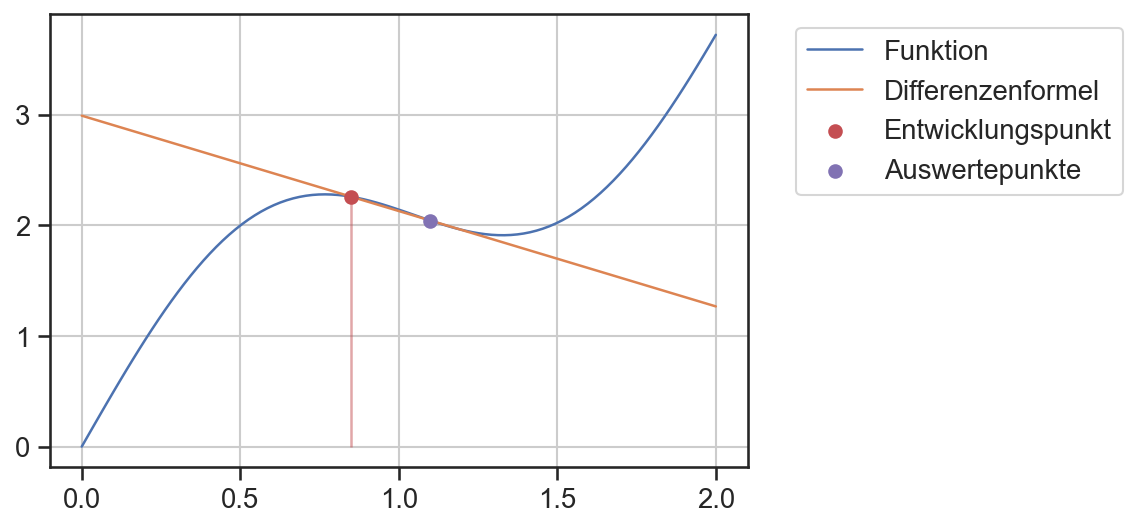

In [66]:
plt.plot(x, y, label="Funktion")
plt.scatter([x0], [f0], color='C3', label='Entwicklungspunkt', zorder=3)
plt.scatter([x0+h], [fh], color='C4', label='Auswertepunkte', zorder=3)

plt.vlines(x0, ymin=0, ymax=f0, color='C3', alpha=0.5)

plt.plot(x, f0 + fp*(x-x0), label='Differenzenformel')

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

## Erste Ableitung zweiter Ordnung

Mit dem gleichen Ansatz kann auch eine Differenzformel zweiter Ordnung gefunden werden. Dazu wird die Funktion an den Stellen $\sf x_0-h$ und $\sf x_0+h$ mit der Taylor-Reihe bis zur Ordnung $\sf \mathcal{O}(h^3)$ approximiert.

$$\sf f(x_0+h) = f(x_0) + f'(x_0)\cdot h + \frac{1}{2}f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$
$$\sf f(x_0-h) = f(x_0) - f'(x_0)\cdot h + \frac{1}{2}f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$

Die Differenz dieser beiden Gleichungen führt zu

$$\sf f(x_0+h) - f(x_0-h) = 2f'(x_0)\cdot h + \mathcal{O}(h^3) $$

Und die Umformung nach der gesuchten Ableitung an der Stelle $\sf x_0$ ergibt

$$\sf f'(x_0) = \frac{f(x_0+h) - f(x_0-h)}{2h} + \mathcal{O}(h^2) $$

Dies ist die zentralle Differenzenformel für die erste Ableitung zweiter Ordnung. Wie bei der vorwärtsgerichteten Formel muss hier die Funktion an zwei Stellen ausgewertet werden, jedoch nicht mehr am Entwicklungspunkt selbst. Durch diese Symmetrie bzgl. des Entwicklungspunkts ergibt sich ein besseres, hier quadratisches, Konvergenzverhalten.

In [69]:
# Auswertung an den beiden Stellen
fnh = fkt(x0 - h)
fph = fkt(x0 + h)

# Bestimmung der Ableitungsnäherung
fp = (fph - fnh) / (2*h)

In [70]:
print(f"Die numerische Näherung der Ableitung an der Stelle {x0:.2f} und Schrittweite {h:.2f} ist {fp:.2f}.")
print(f"Der exakte Wert lautet {fp_exakt:.2f}.")

Die numerische Näherung der Ableitung an der Stelle 0.85 und Schrittweite 0.25 ist -0.26.
Der exakte Wert lautet -0.49.


Die Methode kann auch graphisch dargestellt werden. Die gesuchte Steigung ist die Steigung der eingezeichneten Geraden.

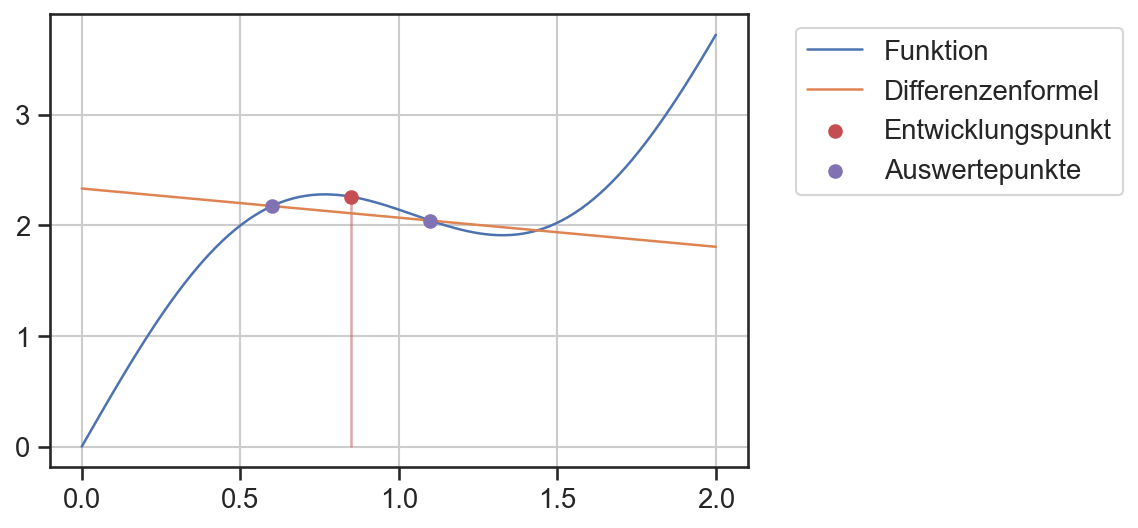

In [72]:
plt.plot(x, y, label="Funktion")
plt.scatter([x0], [f0], color='C3', label='Entwicklungspunkt', zorder=3)
plt.scatter([x0-h, x0+h], [fnh, fph], color='C4', label='Auswertepunkte', zorder=3)

plt.vlines(x0, ymin=0, ymax=f0, color='C3', alpha=0.5)

plt.plot(x, fnh + fp*(x-x0+h), label='Differenzenformel')

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');